<a href="https://colab.research.google.com/github/roshanappa/Time-Series-Analysis-Projects-/blob/master/Moving_Averages%20In%20Time%20Series%20Analysis%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Moving Averages Introduction.

There are various kid of moving averages mostly use in Time Series Analysis :-

- Simple Moving average
- Weighted Moving average
- Exponetial moving average
- Exponential Smoothing moving average.

Moving is to make the base model for the time series analysis .

If we take the typical machine learning techinique in that we also use in order to get the prediction of particular time period.

It is use multiple analytics domain if we take streaming analytics there is also we use the machine learning.

One of the core assumption of moving avearge is basically the time series should stationary.

When we have non-stationary data that time the moving average is not best method use for the forecasting.

When we have our data with stationary or with constant mean then we can we weighted moving averages.

We will perform the moving avearge data on the non-stationary data in order to get the different result if we use the stationary it will not show the much difference in each graph.

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl

mpl.rcParams['figure.figsize']=(15,6)
mpl.rcParams['axes.grid']=False
from datetime import datetime

In [72]:
data = pd.read_csv('/content/electricity_consumption.csv',parse_dates=['Bill_Date'])
data.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [73]:
data.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [74]:
data.tail()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
48,2020-01-01,211,1761.0,231.71,251.85,31
49,2020-02-01,190,1635.0,210.86,229.18,32
50,2020-03-01,151,1179.0,156.56,170.16,29
51,2020-04-01,75,625.0,87.27,94.85,29
52,2020-05-01,147,686.0,124.39,135.19,29


In [75]:
data.shape

(53, 6)

In [76]:
data.isnull().sum()

Bill_Date        0
On_peak          0
Off_peak         0
Usage_charge     0
Billed_amount    0
Billing_days     0
dtype: int64

In [77]:
data.nunique()

Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64

In [78]:
data.dtypes

Bill_Date        datetime64[ns]
On_peak                   int64
Off_peak                float64
Usage_charge            float64
Billed_amount           float64
Billing_days              int64
dtype: object

In [79]:
data.set_index('Bill_Date',inplace=True)

In [137]:
data.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [138]:
bill_2018 = data['2016':'2018']['Billed_amount']

In [139]:
bill_2018.head()

Bill_Date
2016-01-01    247.73
2016-02-01    234.11
2016-03-01    123.85
2016-04-01    111.22
2016-05-01    118.37
Name: Billed_amount, dtype: float64

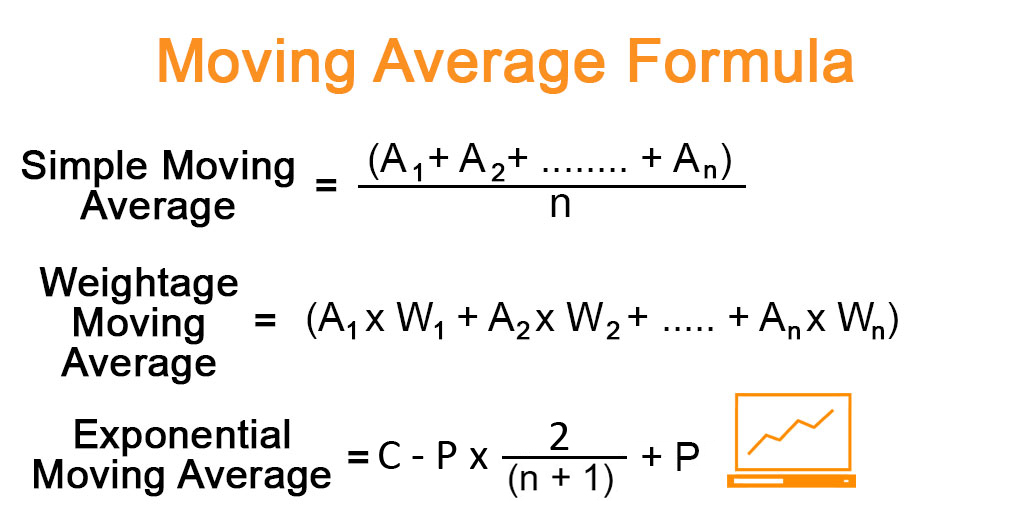

In [92]:
from IPython.display import Image
Image('/content/Moving-Average-Formula..jpg')

## Let Do some Moving Averages Techiniques :-

In this data we have taken the biilled data which is non-stationary since we are taking this column in order to check the various analysis on data.

### Simple Moving Averages.

In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean (MM) or rolling mean and is a type of finite impulse response filter. 

Given a series of numbers and a fixed subset size, the first element of the moving average is obtained by taking the average of the initial fixed subset of the number series. Then the subset is modified by "shifting forward"; that is, excluding the first number of the series and including the next value in the subset.

- A moving average is commonly used with time series data to smooth out short-term fluctuations and highlight longer-term trends or cycles.
-  The threshold between short-term and long-term depends on the application, and the parameters of the moving average will be set accordingly. For example, it is often used in technical analysis of financial data, like stock prices, returns or trading volumes. It is also used in economics to examine gross domestic product, employment or other macroeconomic time series. 

- Mathematically, a moving average is a type of convolution and so it can be viewed as an example of a low-pass filter used in signal processing. When used with non-time series data, a moving average filters higher frequency components without any specific connection to time, although typically some kind of ordering is implied. Viewed simplistically it can be regarded as smoothing the data.

-  financial applications a simple moving average (SMA) is the **unweighted mean of the previous `n` data.**

- However, in science and engineering, the mean is normally taken from an equal number of data on either side of a central value. This ensures that variations in the mean are aligned with the variations in the data rather than being shifted in time. 

- An example of a simple equally weighted running mean for a `n-day` sample of closing price is the `mea`n of the `previous n days` closing prices.

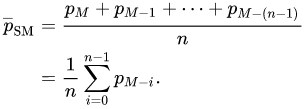

In [84]:
from IPython.display import Image
Image('/content/download (1).png')

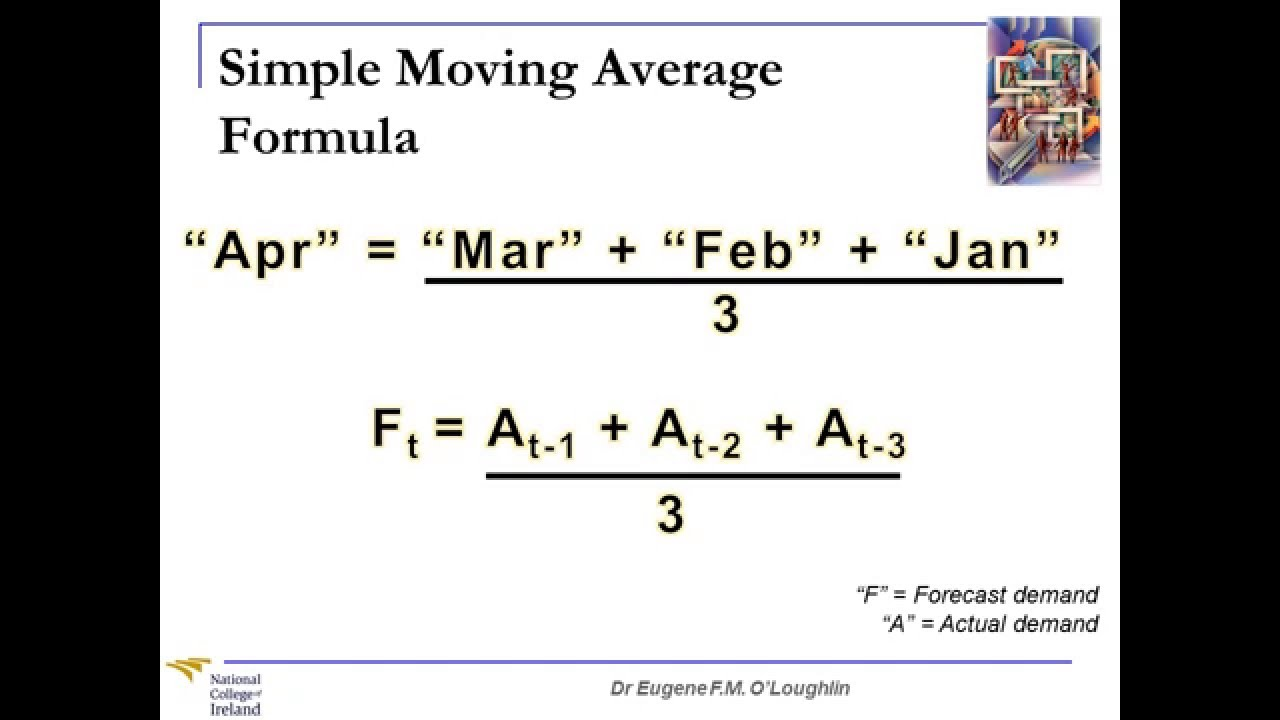

In [85]:
from IPython.display import Image
Image('/content/maxresdefault.jpg',height=400,width=500)

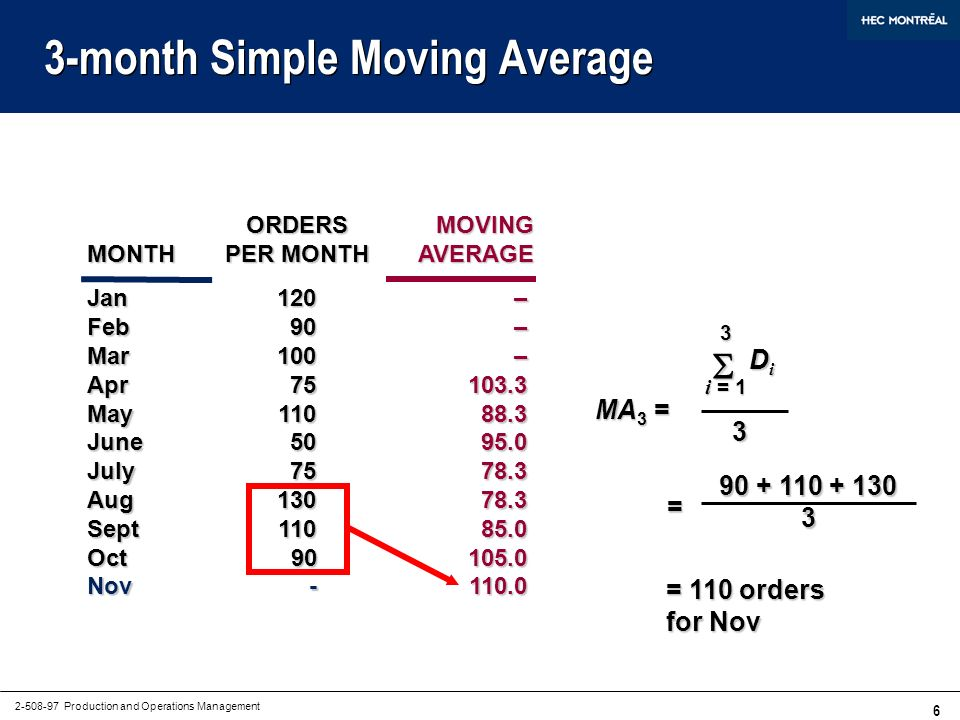

In [86]:
from IPython.display import Image
Image('/content/3-month+Simple+Moving+Average.jpg',height=400,width=500)

In [140]:
bill_2018.rolling(window=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    201.896667
2016-04-01    156.393333
2016-05-01    117.813333
2016-06-01    102.466667
2016-07-01     94.283333
2016-08-01     95.626667
2016-09-01    144.230000
2016-10-01    166.186667
2016-11-01    175.566667
2016-12-01    182.483333
2017-01-01    219.516667
2017-02-01    240.776667
2017-03-01    209.833333
2017-04-01    161.550000
2017-05-01    141.170000
2017-06-01    161.350000
2017-07-01    215.483333
2017-08-01    243.746667
2017-09-01    267.820000
2017-10-01    231.653333
2017-11-01    189.500000
2017-12-01    145.206667
2018-01-01    176.750000
2018-02-01    206.696667
2018-03-01    223.860000
2018-04-01    185.040000
2018-05-01    172.280000
2018-06-01    177.896667
2018-07-01    222.270000
2018-08-01    264.630000
2018-09-01    277.363333
2018-10-01    291.766667
2018-11-01    259.546667
2018-12-01    224.340000
Name: Billed_amount, dtype: float64

In [141]:
MV_data = pd.concat([bill_2018,bill_2018.rolling(window=3).mean()],axis=1)

In [142]:
MV_data.head()

,Billed_amount,Billed_amount
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,201.896667
2016-04-01,111.22,156.393333
2016-05-01,118.37,117.813333


In [145]:
#On te moving averages we wil predict the by using the shift
#If the shift one that time the values of the bill will be use the same for the next data
#because the basic principle of time series always be depended upon the past data for the future prediction.
MV_data['ma_rolling_predicted'] = bill_2018.rolling(window=3).mean().shift(1)

In [146]:
MV_data.columns=['Billed_amount','Rolled Billed amount','ma_rolling_predicted']

In [147]:
MV_data.head()

,Billed_amount,Rolled Billed amount,ma_rolling_predicted
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,201.896667,NaN
2016-04-01,111.22,156.393333,201.896667
2016-05-01,118.37,117.813333,156.393333


If you see the Moving avearge vs predicted one by using shift.
In that we can see there is 277.76 then sudden chnages to 291 where the predited was 277.

So the direct sudden change happend due to some noise data so that is why for the seasonal data the moving average is not good tool because it does not give advantages to latest data.

So,sudden seach might not be detected.

That's the reason we don't we use MV in Non-Stationary data series.

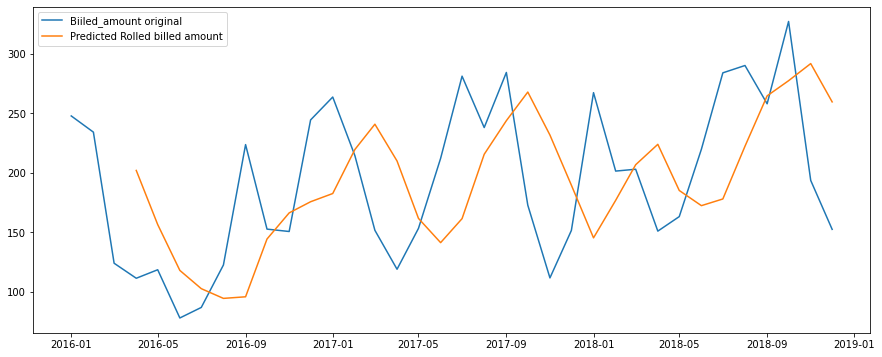

In [149]:
plt.plot(MV_data['Billed_amount'])
plt.plot(MV_data['ma_rolling_predicted'])
plt.legend(['Biiled_amount original','Predicted Rolled billed amount'])
plt.show()

## Weighted Moving Average

- In that last we just use the flat moving avearges so that it will gives values as per the basic fundametal of Weighted Moving Averages.
- The weighted moving average (WMA) is a technical indicator that assigns a greater weighting to the most recent data points, and less weighting to data points in the distant past. The WMA is obtained by multiplying each number in the data set by a predetermined weight and summing up the resulting values.

The weighted moving average (WMA) is a technical indicator that traders use to generate trade direction and make a buy or sell decision. It assigns greater weighting to recent data points and less weighting on past data points. The weighted moving average is calculated by multiplying each observation in the data set by a predetermined weighting factor.

Traders use the weighted average tool to generate trade signals. For example, when the price action moves towards or above the weighted moving average, the signal can be an indication to exit a trade. However, if the price action dips near or just below the weighted moving average, it can be an indication of a favorable time to enter a trade.

Using the weighted moving average to determine trend direction is more accurate than the simple moving average, which assigns identical weights to all numbers in the data set.

When calculating the weighted moving average, the recent data points are assigned a greater weighting, whereas past data points are assigned less weighting. It is used when the figures in the data set come with different weights, relative to each other. The sum of the weight should be equal to 1 or 100%.

It is different from the simple moving average, where all numbers are assigned an equal weighting. The final weighted moving average value reflects the importance of each data point, and it is, therefore, more descriptive of the frequency of concurrency than the simple moving average.

https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/weighted-moving-average-wma/

https://clevertap.com/blog/rfm-analysis/

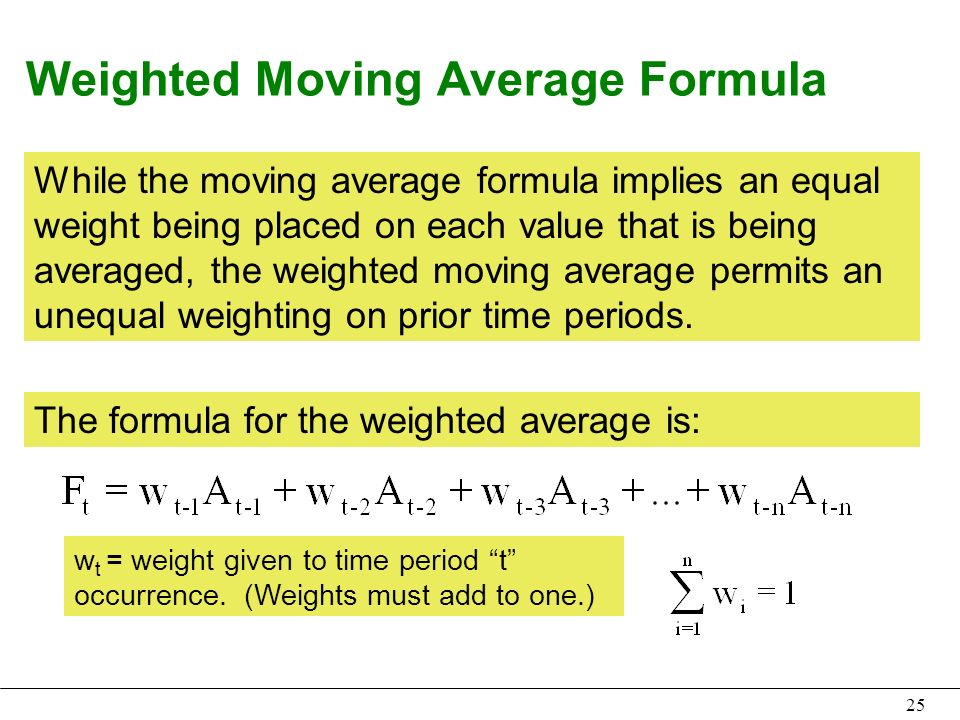

In [114]:
from IPython.display import Image
Image('/content/slide_25.jpg',height=400,width=500)

In [116]:
def wma(weight):
  def calc(x):
    return (weight*x).mean()
  return calc

In [150]:
MV_data['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5])))

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
2018-01-01    202.718333
2018-02-01    215.018333
2018-03-01    213.125000
2018-04-01    176.625000
2018-05-01    165.640000
2018-06-01    189.380000
2018-07-01    242.421667
2018-08-01    276.361667
2018-09-01    273.026667
2018-10-01    297.940000
2018-11-01    248.801667
2018-12-01    195.198333
Name: Billed_amount, dtype: float64

In [151]:
MV_data['WMA_Rolling3_predicted']=MV_data['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1,1.5]))).shift(1)

In [152]:
MV_data

,Billed_amount,Rolled Billed amount,ma_rolling_predicted,WMA_Rolling3_predicted
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN
2016-03-01,123.85,201.896667,NaN,NaN
2016-04-01,111.22,156.393333,201.896667,181.250000
2016-05-01,118.37,117.813333,156.393333,135.911667
2016-06-01,77.81,102.466667,117.813333,116.900000
2016-07-01,86.67,94.283333,102.466667,96.898333
2016-08-01,122.40,95.626667,94.283333,89.000000
2016-09-01,223.62,144.230000,95.626667,103.058333


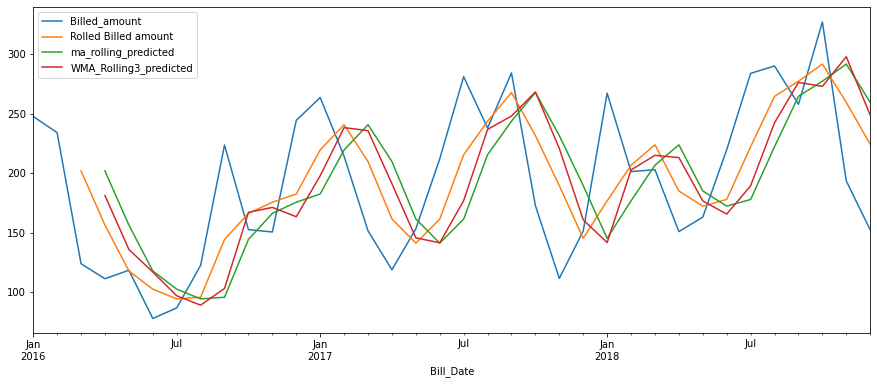

In [153]:
MV_data.plot()
#If we see weighted avearge line is close to original so rmse will less than the simple moving average line.
#That why its better to use.

## Exponential Moving average.
- It is similar to weight average but don't going to take an weight over here.
It takes exponetial moving average of the past data and then it is act as an input to next data rather than `t-1` and `t-2`.

- Advantages of ewm average is adopt more quickly to the data point changes than the simple moving average.

- also very less headache of weight deciding in the weight it will do it internally.

https://www.investopedia.com/terms/e/ema.asp

An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.




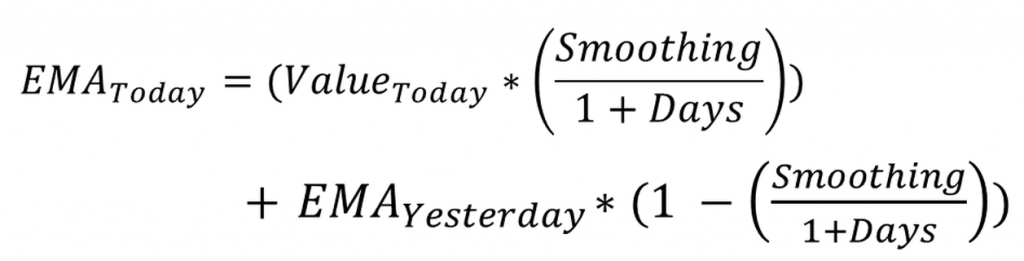

In [127]:
from IPython.display import Image
Image('/content/ema-formula-1024x261.png')

In [154]:
MV_data['Exponential_MV_predicted'] = MV_data['Billed_amount'].ewm(span=3,adjust=False,min_periods=0).mean().shift(1)
#span is working as window function over here.

In [129]:
MV_data

,Billed_amount,Rolled Billed amount,ma_rolling_predicted,WMA_Rolling3_predicted,Exponential_MV_predicted
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN,247.730000
2016-03-01,123.85,201.896667,NaN,NaN,240.920000
2016-04-01,111.22,156.393333,201.896667,181.250000,182.385000
2016-05-01,118.37,117.813333,156.393333,135.911667,146.802500
2016-06-01,77.81,102.466667,117.813333,116.900000,132.586250
2016-07-01,86.67,94.283333,102.466667,96.898333,105.198125
2016-08-01,122.40,95.626667,94.283333,89.000000,95.934063
2016-09-01,223.62,144.230000,95.626667,103.058333,109.167031


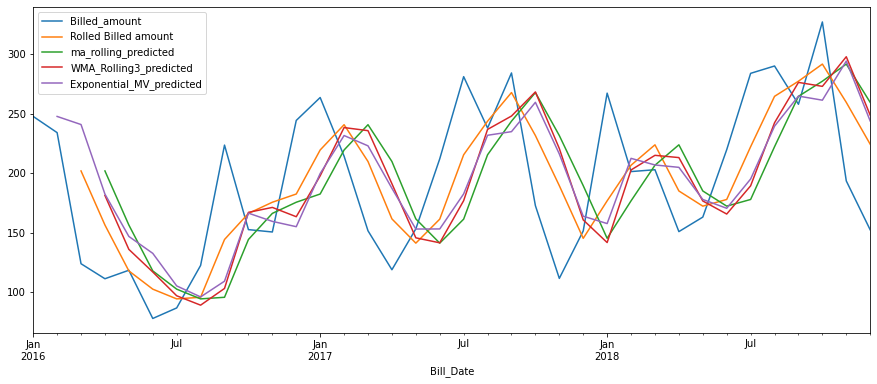

In [155]:
MV_data.plot()

## Exponential Smoothing Averages.

In the above we can see the exponential Moving averages is working on interallly weighted values.

But if we can addition parameter inside the attributes of ewa that is nothing but the `alpha` .

It is influence operation at previous time data and it allows us to decay that values exponentialy.

`ALPHA` values ranges between the `0-1`.

When `Alpha` value is equal to `1` that time the model will gives more attention to recent values.

And the smaller values of `ALPHA` will gives more attention extreme values.

- `α=2/(span+1)`



In [157]:
MV_data['Billed_amount'].ewm(alpha=0.7,adjust=False,min_periods=3).mean().shift(1)

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01           NaN
2016-04-01    158.153800
2016-05-01    125.300140
2016-06-01    120.449042
2016-07-01     90.601713
2016-08-01     87.849514
2016-09-01    112.034854
2016-10-01    190.144456
2016-11-01    163.821337
2016-12-01    154.524401
2017-01-01    217.416320
2017-02-01    249.772896
2017-03-01    224.955869
2017-04-01    173.564761
2017-05-01    135.222428
2017-06-01    147.792728
2017-07-01    192.793819
2017-08-01    254.671146
2017-09-01    242.980344
2017-10-01    271.904103
2017-11-01    202.454231
2017-12-01    138.793269
2018-01-01    147.631981
2018-02-01    231.413594
2018-03-01    210.369078
2018-04-01    205.147723
2018-05-01    167.146317
2018-06-01    164.292895
2018-07-01    203.119869
2018-08-01    259.721961
2018-09-01    281.021588
2018-10-01    264.878476
2018-11-01    308.496543
2018-12-01    227.991963
Name: Billed_amount, dtype: float64

In [158]:
MV_data['ExpoweightSMOOT_pred']=MV_data['Billed_amount'].ewm(alpha=0.7,adjust=False,min_periods=3).mean().shift(1)

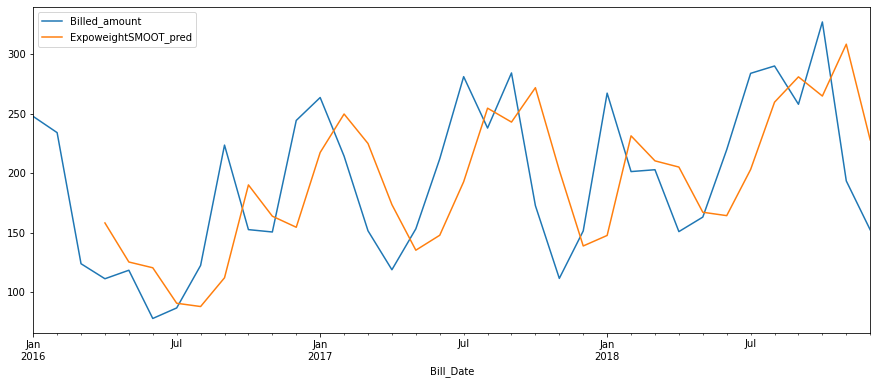

In [159]:
MV_data[['Billed_amount','ExpoweightSMOOT_pred']].plot()

If we closely observed that the our weighted Moving averages is closely for following the pattern of the original data.Since there is gap in between the two to line .That means the error avalibity.We need to find the Mean_squared_error for that.

In [160]:
MV_data['ExpoweightSMOOT_pred_0.3']=MV_data['Billed_amount'].ewm(alpha=0.3,adjust=False,min_periods=3).mean().shift(1)
#now we are giving the more weightage to the most extreme values.

In [161]:
MV_data

,Billed_amount,Rolled Billed amount,ma_rolling_predicted,WMA_Rolling3_predicted,Exponential_MV_predicted,ExpoweightSMOOT_pred,ExpoweightSMOOT_pred_0.3
Bill_Date,,,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,NaN,247.730000,NaN,NaN
2016-03-01,123.85,201.896667,NaN,NaN,240.920000,NaN,NaN
2016-04-01,111.22,156.393333,201.896667,181.250000,182.385000,158.153800,207.705800
2016-05-01,118.37,117.813333,156.393333,135.911667,146.802500,125.300140,178.760060
2016-06-01,77.81,102.466667,117.813333,116.900000,132.586250,120.449042,160.643042
2016-07-01,86.67,94.283333,102.466667,96.898333,105.198125,90.601713,135.793129
2016-08-01,122.40,95.626667,94.283333,89.000000,95.934063,87.849514,121.056191
2016-09-01,223.62,144.230000,95.626667,103.058333,109.167031,112.034854,121.459333


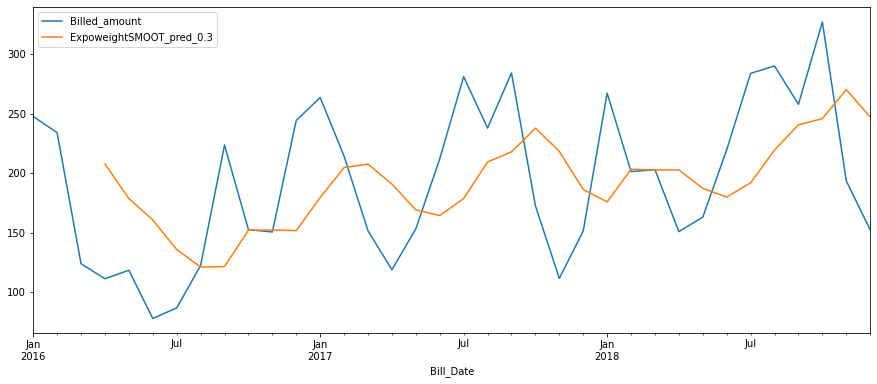

In [164]:
MV_data[['Billed_amount','ExpoweightSMOOT_pred_0.3']].plot()

In the above we can see that the there is the smooth exponential with alpha 0.3 is giving me a better at the etrem values.But is moving flattly instead of moving with original.

It also required whever we want the flatten the data so we will get the some period to go outside.

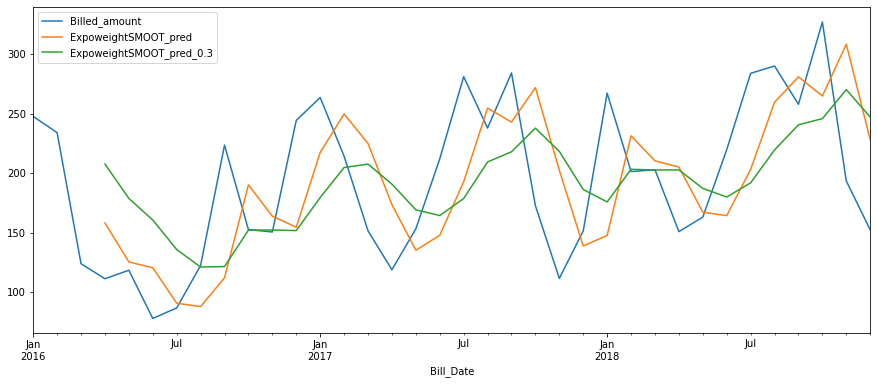

In [166]:
MV_data[['Billed_amount','ExpoweightSMOOT_pred','ExpoweightSMOOT_pred_0.3']].plot()

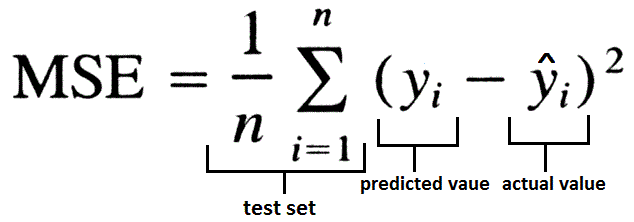

In [167]:
from IPython.display import Image
Image('/content/image003-1.png')

In [168]:
MV_data.columns

Index(['Billed_amount', 'Rolled Billed amount', 'ma_rolling_predicted',
       'WMA_Rolling3_predicted', 'Exponential_MV_predicted',
       'ExpoweightSMOOT_pred', 'ExpoweightSMOOT_pred_0.3'],
      dtype='object')

In [172]:
 ((MV_data['Billed_amount']-  MV_data['ma_rolling_predicted'])**2).mean()**0.5

70.98561687433802

In [173]:
 ((MV_data['Billed_amount']-  MV_data['WMA_Rolling3_predicted'])**2).mean()**0.5

65.82572602256133

In [174]:
 ((MV_data['Billed_amount']-  MV_data['Exponential_MV_predicted'])**2).mean()**0.5

64.32131239414655

In [175]:
 ((MV_data['Billed_amount']-  MV_data['ExpoweightSMOOT_pred'])**2).mean()**0.5

61.26408398853503

In [176]:
 ((MV_data['Billed_amount']-  MV_data['ExpoweightSMOOT_pred_0.3'])**2).mean()**0.5

65.22424423118377

From the above we can see there is low MSE in the Expoential weighted averages as compared to the other so we can for this datasets the Exponential weighted averages is better choice as base model.

## Thank You !!